In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("./seasonStats.csv")
df = df.dropna()

In [3]:
df = df.loc[df["GamesWon"] > 0]
df.loc[(df["GamesWon"] >= 0) & (df["GamesWon"] <=10), "GamesWon"] = 10
df.loc[(df["GamesWon"] >= 11) & (df["GamesWon"] <=20), "GamesWon"] = 20
df.loc[(df["GamesWon"] >= 21) & (df["GamesWon"] <= 30), "GamesWon"] = 30
df.loc[(df["GamesWon"] >= 31) , "GamesWon"] = 40

In [12]:
X_mod = df.drop(["Unnamed: 0", "Season", "TeamID", "GamesWon", "HighDay", "AVGScore", "OAVGScore", "RATScore"], axis = 1)
X_mod_cols = X_mod.columns
X_num = np.array(X_mod)
X_num = MinMaxScaler().fit_transform(X_num)
y_num = np.array(df[["GamesWon"]])

In [68]:
# seed_value = 352443
# seed_value = 43123
seed_value = 1275213213
import tensorflow as tf
tf.random.set_seed(seed_value)
import random
random.seed(seed_value)
import numpy as np
np.random.seed(seed_value)

In [69]:
encoding_dim = 2

input_data = keras.Input(shape =(39,))

encoded = layers.Dense(32, activation='relu')(input_data)
encoded = layers.Dense(16, activation='relu')(encoded)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)

decoded = layers.Dense(16, activation='relu')(encoded)
decoded = layers.Dense(32, activation='relu')(decoded)
decoded = layers.Dense(39, activation='sigmoid')(decoded)


autoencoder = keras.Model(input_data, decoded)
encoder = keras.Model(input_data, encoded)
encoded_input = keras.Input(shape=(encoding_dim,))
# decoder_layer
# decoder = keras.Model(encoded_input, decoder_layer3(dec))

In [70]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

X_train = X_num[:6000]
X_test = X_num[6000:]

autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test),
                verbose = 0
               )

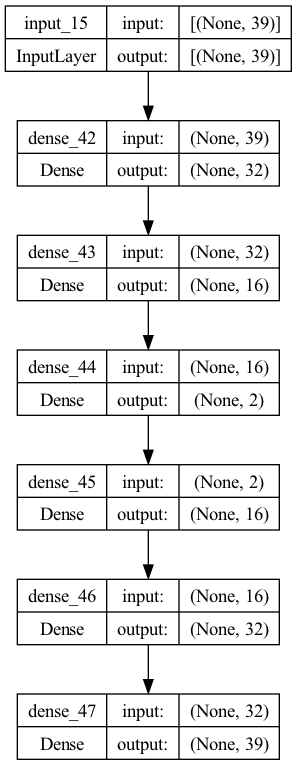

In [71]:
keras.utils.plot_model(autoencoder, to_file="./plots/architecture.png", show_shapes=True)

In [72]:
decoded_data = autoencoder.predict(X_num)
decoded_data[1]

227/227 [==============================] - 0s 273us/step


array([0.47459292, 0.40121263, 0.38813174, 0.3536557 , 0.5545126 ,
       0.53908074, 0.5737204 , 0.56116146, 0.4225739 , 0.41954583,
       0.35693905, 0.35522106, 0.6644384 , 0.33316973, 0.49178922,
       0.37114567, 0.4185087 , 0.3901406 , 0.36724216, 0.50588065,
       0.3680073 , 0.33567855, 0.38823992, 0.37907833, 0.4036053 ,
       0.76493436, 0.49627894, 0.35211843, 0.30805498, 0.32637644,
       0.37565988, 0.37785557, 0.43231922, 0.48923883, 0.4192041 ,
       0.3778598 , 0.25967488, 0.3116636 , 0.6523775 ], dtype=float32)

In [73]:
encoded_data = encoder.predict(X_num)
encoded_data[2]

227/227 [==============================] - 0s 258us/step


array([1.0310673 , 0.86723816], dtype=float32)

In [74]:
df["e0"] = encoded_data[:, 0]
df["e1"] = encoded_data[:, 1]
# df["e2"] = encoded_data[:, 2]
# df["e3"] = encoded_data[:, 3]

In [75]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.scatterplot(data = df, x = "e0", y = "e1", hue= "GamesWon")
ax.set_xlabel("E0", size=16)
ax.set_ylabel("E1", size=16)
ax.legend(title="Games Won", fontsize=18, title_fontsize=20)
plt.savefig("./plots/AutoEncodeExample6.png", dpi=200)

In [64]:
encoder.layers[2].get_weights()

[array([[-1.45508289e-01,  1.66728333e-01,  2.59521574e-01,
          1.75233349e-01,  6.56548887e-02,  1.80930674e-01,
         -1.55249447e-01, -4.09952514e-02, -4.62504514e-02,
          1.65885270e-01, -1.73252389e-01,  2.14633375e-01,
         -2.80276954e-01, -6.83719572e-03, -2.86900342e-01,
          2.73134410e-02],
        [ 3.35724264e-01,  1.21345118e-01,  1.64114714e-01,
         -1.08279563e-01,  2.21517175e-01,  3.20987552e-01,
          2.31771424e-01, -1.08139455e-01,  3.08554053e-01,
          1.29502311e-01,  1.24058597e-01,  2.26613060e-01,
         -9.99864191e-02,  2.90763587e-01,  2.21773356e-01,
          3.15885812e-01],
        [ 2.34132677e-01,  1.86644047e-01,  1.71037108e-01,
          8.23828764e-03, -5.50237708e-02, -1.44285321e-01,
          2.30645150e-01, -1.55233830e-01, -2.14575037e-01,
          2.22270697e-01, -2.46470541e-01,  2.72523105e-01,
          1.85518995e-01, -1.46846682e-01, -8.69843364e-03,
          5.65180182e-03],
        [ 3.9179712